# Enunciado

Utilizando o dataset do Spotify construa um modelo sequencial ou funcional no Keras para
fazer a classificação desse dataset.

## Dicas:
 - Tente calibrar a quantidade de camadas e neurônios a fim de atingir uma acurácia superior a 74%;
 - Tente utilizar ó dropout a fim de evitar eventual overfitting.
 - Aplique os pré-processamentos necessários.
 - Apresente a evolução do conjunto de treino e validação.
 - Apresente a acurácia do conjunto de testes.
 - Apresente a configuração (estrutura) da rede neural.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, AveragePooling1D, BatchNormalization, Activation, GlobalMaxPooling1D
import matplotlib.pyplot as plt

2023-02-04 11:55:38.292949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 11:55:38.422745: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 11:55:38.422792: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 11:55:39.146294: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
data = pd.read_csv("../data/spotify.csv")

In [3]:
data.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
X = data.drop(["target", "song_title", "artist", "id"], axis=1)
y = data["target"]
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [7]:
x_train.shape

(1613, 13)

In [8]:
x_test.shape

(404, 13)

In [9]:
(x_train, x_valid) = x_train[1500:], x_train[:1500]
(y_train, y_valid) = y_train[1500:], y_train[:1500]

In [16]:
model = Sequential()
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

#TODO: Adjust the model to get better results

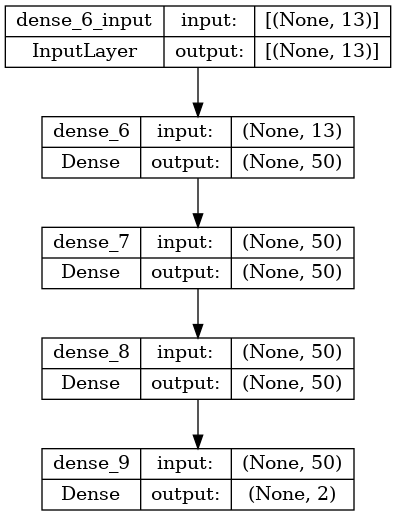

In [17]:
plot_model(model, to_file='spotify.png', show_shapes=True, show_layer_names=True)

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
result = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/10
4/4 [==============================] - 1s 68ms/step - loss: 4604.8579 - accuracy: 0.5575 - val_loss: 1170.4773 - val_accuracy: 0.5073
Epoch 2/10
4/4 [==============================] - 0s 31ms/step - loss: 1961.7688 - accuracy: 0.4425 - val_loss: 1169.0656 - val_accuracy: 0.5073
Epoch 3/10
4/4 [==============================] - 0s 29ms/step - loss: 906.3579 - accuracy: 0.4867 - val_loss: 1665.4233 - val_accuracy: 0.4927
Epoch 4/10
4/4 [==============================] - 0s 30ms/step - loss: 1459.8795 - accuracy: 0.5575 - val_loss: 647.9054 - val_accuracy: 0.4927
Epoch 5/10
4/4 [==============================] - 0s 29ms/step - loss: 658.0180 - accuracy: 0.4248 - val_loss: 1333.8719 - val_accuracy: 0.5073
Epoch 6/10
4/4 [==============================] - 0s 29ms/step - loss: 1117.3823 - accuracy: 0.4425 - val_loss: 243.2502 - val_accuracy: 0.4927
Epoch 7/10
4/4 [==============================] - 0s 29ms/step - loss: 565.2954 - accuracy: 0.5575 - val_loss: 744.9127 - val_accuracy

In [22]:
score = model.evaluate(x_test, y_test, batch_size=32)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])
# TODO: accuracy >= 75%

13/13 [==============================] - 0s 2ms/step - loss: 497.7266 - accuracy: 0.5396
Test loss:  497.7265625
Test accuracy:  0.5396039485931396


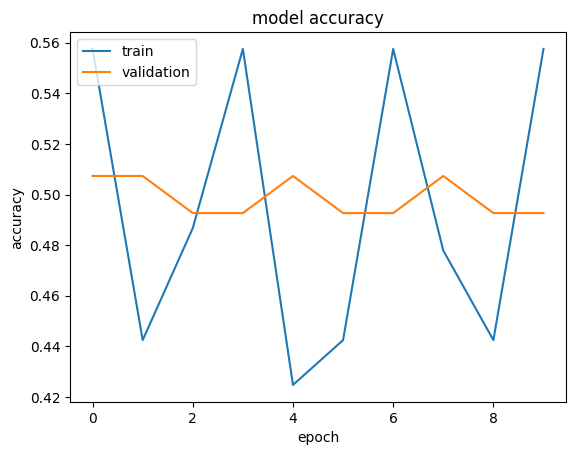

In [23]:
plt.figure(1)
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()